In [1]:
from controller import *

In [2]:
#impulse = make_impulse(truth[:1000], N=10, plot=True)

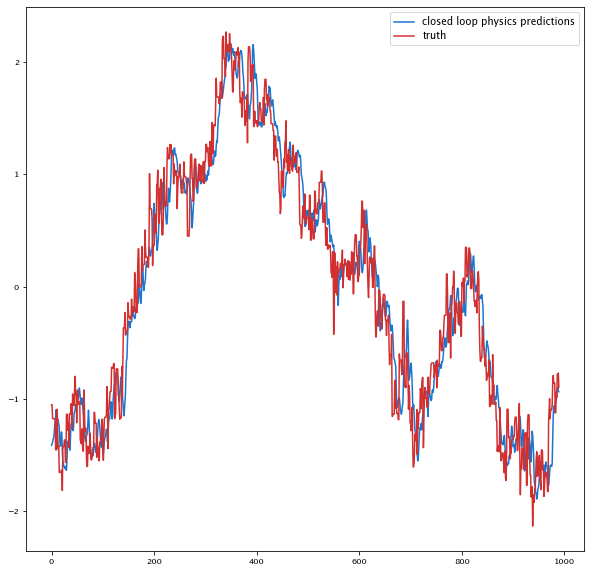

In [11]:
plt.figure(figsize=(10,10))
kalman.kfilter.state = np.flip(truth[1000:1010])
run, predict = kalman.kfilter.run(truth[1010:2000] + np.random.normal(0, 0.06, (990,)), save_physics=True)
#plt.plot(run, label = 'kfilter output')
plt.plot(predict, label='closed loop physics predictions')
kalman.kfilter.state = np.flip(truth[:10])
plt.plot(truth[1010:2000], label='truth')
plt.legend()

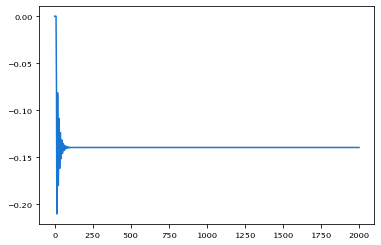

In [18]:
# just rewriting a Kalman control simulation inline here because something's not working

size = truth.size
state_size = kalman.kfilter.A.shape[0]
shifts = np.diff(truth)
actions = np.zeros(size)
state = np.flip(truth[:state_size])
residuals = np.zeros(size)
residuals[:state_size] = truth[:state_size]
predictions = np.zeros(size)
for i in range(state_size, size):
    residuals[i] = residuals[i - 1] + actions[i - 1] + shifts[i - 1]
    kalman.kfilter.update()

plt.plot(predictions)

In [13]:
kalman.kfilter.A.shape[0]

10